This notebook is supposed to help explain in a little bit more detail the skimage blobl finding algorithum.  It is just a little neat example you can play around with and get a bit more of a feel for 

In [4]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

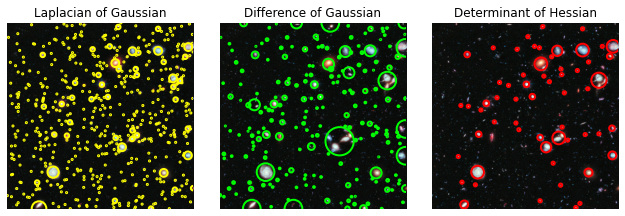

In [3]:
image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [36]:
from scipy.ndimage import gaussian_filter, gaussian_laplace
import numpy as np

In [37]:
sigma = range(1, 30,3)
space_scale = [-gaussian_laplace(image_gray,s)* np.mean(s) ** 2for s in sigma]

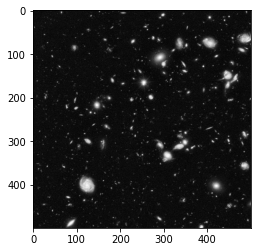

In [40]:
plt.imshow(image_gray, cmap="gray")

[<AxesSubplot:title={'center':'Sigma= 1'}>,
 <AxesSubplot:title={'center':'Sigma= 4'}>,
 <AxesSubplot:title={'center':'Sigma= 7'}>,
 <AxesSubplot:title={'center':'Sigma= 10'}>,
 <AxesSubplot:title={'center':'Sigma= 13'}>,
 <AxesSubplot:title={'center':'Sigma= 16'}>,
 <AxesSubplot:title={'center':'Sigma= 19'}>,
 <AxesSubplot:title={'center':'Sigma= 22'}>,
 <AxesSubplot:title={'center':'Sigma= 25'}>,
 <AxesSubplot:title={'center':'Sigma= 28'}>]

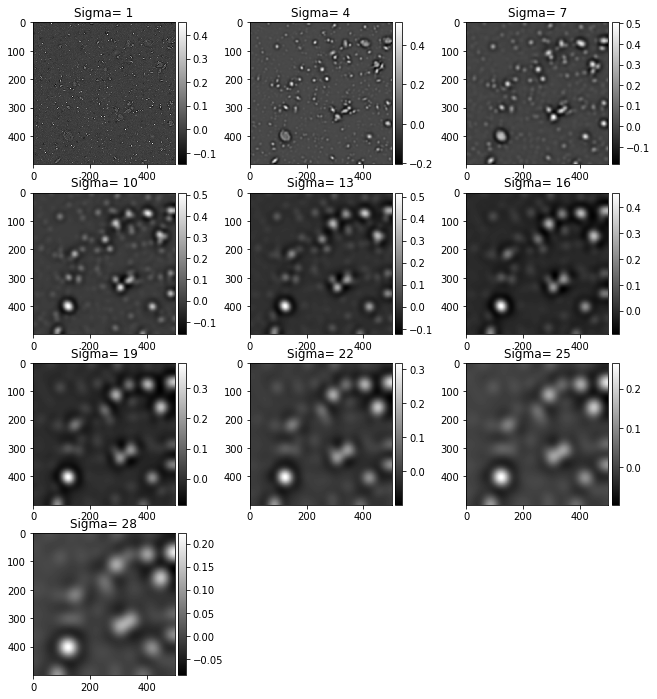

In [38]:
f= plt.figure(figsize=(11,12))
labels = ["Sigma= "+str(s) for s in sigma]
hs.plot.plot_images(hs.signals.Signal2D(space_scale).split(),fig=f, label=labels)

<IPython.core.display.Javascript object>


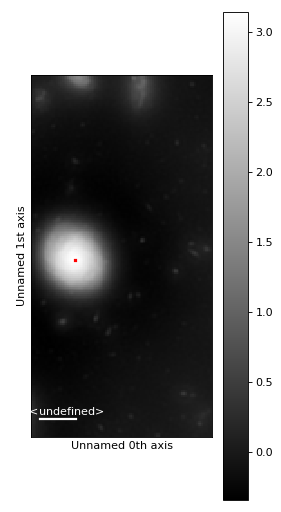

<IPython.core.display.Javascript object>


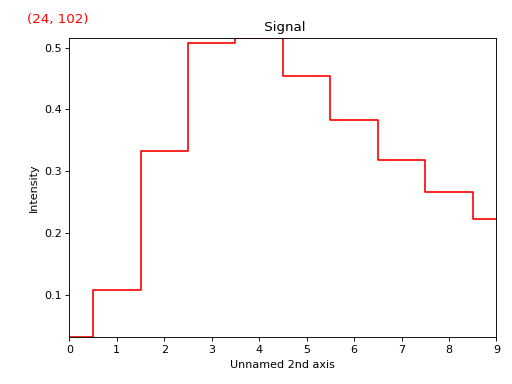

In [44]:
%matplotlib notebook
hs.signals.Signal2D(space_scale).T.inav[100:200,300:500].plot()